In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, StratifiedKFold,GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier

import scipy.stats as stats
from scipy.stats import chi2_contingency

from datetime import date

import warnings
warnings.filterwarnings("ignore")

In [96]:
train_demo=pd.read_excel('train_demo.xlsx')
train_habits=pd.read_excel('train_habits.xlsx')
train_health=pd.read_excel('train_health.xlsx')

In [97]:
print(train_demo.shape)
print(train_habits.shape)
print(train_health.shape)

(800, 6)
(800, 6)
(800, 9)


In [98]:
train_df = train_demo.merge(train_habits, on = 'PatientID').merge(train_health, on = 'PatientID')
train_df.head(3)


,PatientID,Name,Birth_Year,Region,Education,Disease,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
0,1167,Mrs. Stephanie Gay,1965,London,High School Incomplete (10th to 11th grade),1,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,155,67,358,120,21,2,More than 3 years,Neither I nor my immediate family have diabetes.
1,1805,Mr. Sherman Nero,1969,South West,High School Incomplete (10th to 11th grade),1,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,173,88,230,142,9,0,Not sure,Neither I nor my immediate family have diabetes.
2,1557,Mr. Mark Boller,1974,Yorkshire and the Humber,Elementary School (1st to 9th grade),1,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,162,68,226,122,26,0,More than 3 years,Neither I nor my immediate family have diabetes.


In [99]:
train_df.set_index('PatientID', inplace=True)

In [100]:
train_df.sort_index(axis=0, inplace=True)

In [101]:
train_df.head(3)

,Name,Birth_Year,Region,Education,Disease,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
PatientID,,,,,,,,,,,,,,,,,,
1001,Mr. Charles Bolek,1969,East of England,High School Graduate,0,Yes,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,174,54,207,140,19,15,Not sure,Neither I nor my immediate family have diabetes.
1003,Mr. Boyd Cook,1961,Yorkshire and the Humber,High School Graduate,0,No,I usually consume alcohol every day,No,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,173,76,207,148,20,0,Not sure,Neither I nor my immediate family have diabetes.
1004,Mrs. Maggie Jones,1960,London,University Complete (3 or more years),0,Yes,I usually consume alcohol every day,No,5 to 6 pieces of fruit in average,Between one liter and two liters,155,59,298,138,8,9,More than 3 years,Neither I nor my immediate family have diabetes.


In [102]:
train_df.value_counts('Disease')

Disease
1    411
0    389
dtype: int64

<a class="anchor" id="4th-bullet">


###  Create Column Gender

</a>

In [103]:
train_df['Gender'] = train_df.apply(lambda row: 'Male' if row['Name'].startswith('Mr.') else 'Female', axis=1)

In [104]:
#Checking if it's right
train_df[['Name','Gender']]

,Name,Gender
PatientID,,
1001,Mr. Charles Bolek,Male
1003,Mr. Boyd Cook,Male
1004,Mrs. Maggie Jones,Female
1005,Mrs. Hazel Eison,Female
1006,Mr. Luis Pham,Male
...,...,...
2019,Mr. William Hurd,Male
2020,Mr. Jim Garrett,Male
2022,Mr. Barry Holman,Male


In [105]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1001 to 2024
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              800 non-null    object
 1   Birth_Year        800 non-null    int64 
 2   Region            800 non-null    object
 3   Education         787 non-null    object
 4   Disease           800 non-null    int64 
 5   Smoking_Habit     800 non-null    object
 6   Drinking_Habit    800 non-null    object
 7   Exercise          800 non-null    object
 8   Fruit_Habit       800 non-null    object
 9   Water_Habit       800 non-null    object
 10  Height            800 non-null    int64 
 11  Weight            800 non-null    int64 
 12  High_Cholesterol  800 non-null    int64 
 13  Blood_Pressure    800 non-null    int64 
 14  Mental_Health     800 non-null    int64 
 15  Physical_Health   800 non-null    int64 
 16  Checkup           800 non-null    object
 17  Diabetes    

<a class="anchor" id="4th-bullet">


###  Fill Missing on Train

</a>

In [106]:
train_df['Education'].fillna('Unknown', inplace = True)
train_df[train_df['Education']=='Unknown'].head(3)

,Name,Birth_Year,Region,Education,Disease,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes,Gender
PatientID,,,,,,,,,,,,,,,,,,,
1048,Mrs. Margaret Wysong,1956,East Midlands,Unknown,1,No,I consider myself a social drinker,No,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,166,67,282,146,18,0,More than 3 years,I have/had pregnancy diabetes or borderline di...,Female
1072,Mr. Steven Fisher,1866,East Midlands,Unknown,0,Yes,I consider myself a social drinker,Yes,1 to 2 pieces of fruit in average,Between one liter and two liters,171,62,253,125,16,5,More than 3 years,Neither I nor my immediate family have diabetes.,Male
1085,Mr. Robert Swenson,1978,South West,Unknown,1,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters,165,72,224,120,22,0,More than 3 years,I do have diabetes,Male


In [107]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1001 to 2024
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              800 non-null    object
 1   Birth_Year        800 non-null    int64 
 2   Region            800 non-null    object
 3   Education         800 non-null    object
 4   Disease           800 non-null    int64 
 5   Smoking_Habit     800 non-null    object
 6   Drinking_Habit    800 non-null    object
 7   Exercise          800 non-null    object
 8   Fruit_Habit       800 non-null    object
 9   Water_Habit       800 non-null    object
 10  Height            800 non-null    int64 
 11  Weight            800 non-null    int64 
 12  High_Cholesterol  800 non-null    int64 
 13  Blood_Pressure    800 non-null    int64 
 14  Mental_Health     800 non-null    int64 
 15  Physical_Health   800 non-null    int64 
 16  Checkup           800 non-null    object
 17  Diabetes    

In [108]:
#Check for any kind of mistakes (some rows having disease with other value)
train_df['Disease'].unique()

array([0, 1], dtype=int64)

In [109]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Birth_Year,800.0,1966.04375,15.421872,1855.0,1961.00,1966.0,1974.0,1993.0
Disease,800.0,0.51375,0.500124,0.0,0.00,1.0,1.0,1.0
Height,800.0,167.80625,7.976888,151.0,162.00,167.0,173.0,180.0
Weight,800.0,67.82750,12.113470,40.0,58.00,68.0,77.0,97.0
High_Cholesterol,800.0,249.32250,51.566631,130.0,213.75,244.0,280.0,568.0
Blood_Pressure,800.0,131.05375,17.052693,94.0,120.00,130.0,140.0,200.0
Mental_Health,800.0,17.34500,5.385139,0.0,13.00,18.0,21.0,29.0
Physical_Health,800.0,4.55875,5.449189,0.0,0.00,3.0,7.0,30.0


<a class="anchor" id="4th-bullet">


###  Target Variable

</a>

In [110]:
train_data = train_df.drop('Disease', axis=1).copy()
train_target = train_df['Disease'].copy()

In [111]:
X_train, X_test, y_train, y_test = train_test_split(train_data, train_target, test_size = 0.15, random_state=10
                                                    ,shuffle=True, stratify=train_target)

In [112]:
y_test

PatientID
1121    0
1034    1
1201    1
1073    0
1285    1
       ..
1992    1
1906    1
1592    0
1933    0
1730    1
Name: Disease, Length: 120, dtype: int64

In [113]:
y_train

PatientID
1585    1
1481    0
1009    0
1206    0
1560    1
       ..
1515    0
1921    0
1021    1
1523    0
1434    1
Name: Disease, Length: 680, dtype: int64

In [114]:
X_test

,Name,Birth_Year,Region,Education,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes,Gender
PatientID,,,,,,,,,,,,,,,,,,
1121,Mr. George Knight,1978,South West,High School Graduate,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,174,54,173,120,16,13,Less than 3 years but more than 1 year,Neither I nor my immediate family have diabetes.,Male
1034,Mr. Matt Scott,1972,West Midlands,University Incomplete (1 to 2 years),No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters,178,81,200,129,21,0,More than 3 years,I have/had pregnancy diabetes or borderline di...,Male
1201,Mr. Micheal Carter,1988,East Midlands,High School Graduate,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,178,92,186,118,23,0,More than 3 years,"I don't have diabetes, but I have direct famil...",Male
1073,Mr. Angel Murillo,1963,South East,High School Incomplete (10th to 11th grade),No,I usually consume alcohol every day,Yes,1 to 2 pieces of fruit in average,Between one liter and two liters,178,83,181,140,20,0,Not sure,Neither I nor my immediate family have diabetes.,Male
1285,Mrs. Ashley Alonzo,1951,Yorkshire and the Humber,High School Graduate,Yes,I consider myself a social drinker,No,1 to 2 pieces of fruit in average,Between one liter and two liters,167,75,269,110,13,0,More than 3 years,I have/had pregnancy diabetes or borderline di...,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,Mrs. George Brighton,1972,East of England,Elementary School (1st to 9th grade),No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters,167,81,258,110,20,0,More than 3 years,Neither I nor my immediate family have diabetes.,Female
1906,Mr. James Cooper,1980,South West,Elementary School (1st to 9th grade),No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters,167,82,230,140,24,0,More than 3 years,Neither I nor my immediate family have diabetes.,Male
1592,Mr. Rodney Lambert,1952,West Midlands,High School Incomplete (10th to 11th grade),No,I usually consume alcohol every day,Yes,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,167,68,273,160,9,14,Not sure,I have/had pregnancy diabetes or borderline di...,Male


In [115]:
##VER SE AS VARIAVEIS COM 0 E 1 SAO NUMERICAS OU CATEGORICAS
train_data_num = X_train.select_dtypes(include=np.number).set_index(X_train.index).copy()
train_data_cat = X_train.select_dtypes(exclude=np.number).set_index(X_train.index).copy()

test_data_num = X_test.select_dtypes(include=np.number).set_index(X_test.index).copy()
test_data_cat = X_test.select_dtypes(exclude=np.number).set_index(X_test.index).copy()

<a class="anchor" id="4th-bullet">


###  Outliers

</a>

In [116]:
train_data_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Birth_Year,680.0,1966.130882,15.687831,1859.0,1961.0,1966.0,1974.0,1993.0
Height,680.0,167.861765,7.847310,151.0,162.0,167.0,173.0,180.0
Weight,680.0,67.767647,12.134815,40.0,58.0,68.0,76.0,97.0
High_Cholesterol,680.0,248.738235,50.393904,130.0,213.0,243.0,279.0,568.0
Blood_Pressure,680.0,131.083824,17.357211,94.0,120.0,130.0,140.0,200.0
Mental_Health,680.0,17.398529,5.417340,0.0,13.0,18.0,21.0,29.0
Physical_Health,680.0,4.545588,5.443049,0.0,0.0,3.0,7.0,30.0


<a class="anchor" id="4th-bullet">


##### 1st method

</a>

In [117]:
filters1 = (
    (train_data_num['Birth_Year']>=1940)
    &
    (train_data_num['Weight']>=45)
    &
    (train_data_num['High_Cholesterol']<=350)
    &
    (train_data_num['Blood_Pressure']>=96)
    &
    (train_data_num['Blood_Pressure']<=180)
    &
    (train_data_num['Physical_Health']<=20)
)

df_1 = train_data_num[filters1]
print('Percentage of data kept after removing outliers:', np.round(df_1.shape[0] / train_data_num.shape[0], 4))

Percentage of data kept after removing outliers: 0.9412


In [118]:
df_1.describe().T

,count,mean,std,min,25%,50%,75%,max
Birth_Year,640.0,1967.892188,8.989610,1945.0,1962.0,1966.0,1975.0,1993.0
Height,640.0,168.046875,7.741379,151.0,162.0,171.0,173.0,180.0
Weight,640.0,68.209375,11.902837,45.0,59.0,68.0,77.0,97.0
High_Cholesterol,640.0,244.887500,43.594624,130.0,212.0,241.0,277.0,346.0
Blood_Pressure,640.0,130.759375,16.480792,100.0,120.0,130.0,140.0,180.0
Mental_Health,640.0,17.350000,5.452828,0.0,13.0,18.0,21.0,29.0
Physical_Health,640.0,4.275000,5.003536,0.0,0.0,2.0,7.0,20.0


In [119]:
#Number of records
df_1.shape[0]

640

<a class="anchor" id="4th-bullet">


##### 2nd Method - IQR

</a>

In [120]:
metric_features = train_data_num.columns.to_list()
q25 = train_data_num.quantile(.25)
q75 = train_data_num.quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr

filters2 = []
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters2.append(train_data_num[metric].between(llim, ulim, inclusive=True))

filters2 = pd.Series(np.all(filters2, 0))
df_2=train_data_num.copy()
df_2['filters2'] = filters2.to_list()
df_2=df_2[df_2['filters2']!=False]
print('Percentage of data kept after removing outliers:', np.round(df_2.shape[0] / train_data_num.shape[0], 4))

Percentage of data kept after removing outliers: 0.9206


<a class="anchor" id="4th-bullet">


##### Combining both methods

</a>

In [121]:
df_3 = train_data_num.copy()
df_3['filters1'] = filters1.to_list()
df_3['filters2'] = filters2.to_list()
# index_to_drop=df_3[(df_3['filters1']==False) | (df_3['filters2']==False)].index
df_3 = df_3[(df_3['filters1']==True) | (df_3['filters2']==True)]
print('Percentage of data kept after removing outliers:', np.round(df_3.shape[0] / train_data_num.shape[0], 4))

Percentage of data kept after removing outliers: 0.9574


<a class="anchor" id="4th-bullet">


##### Remove from train_data_cat and train_target all records removed on train_data_num
##### Drop from train_data_num columns filters1 and filters2
</a>

In [122]:
#Eliminar do train_data_cat os que nao estavam no train_data_num
train_data_num=df_3.copy()
train_data_cat=train_data_cat[train_data_cat.index.isin(train_data_num.index)]
y_train=y_train[y_train.index.isin(train_data_num.index)]
train_data_num.drop(['filters1', 'filters2'], axis=1, inplace=True)
train_data_num

,Birth_Year,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health
PatientID,,,,,,,
1585,1982,162,71,203,140,24,6
1009,1968,174,70,290,122,10,15
1206,1963,171,60,222,126,14,10
1560,1964,157,47,201,130,13,2
1403,1976,154,61,208,105,23,0
...,...,...,...,...,...,...,...
1515,1973,180,62,192,120,15,9
1921,1964,171,71,222,146,7,9
1021,1955,155,72,227,106,16,1


<a class="anchor" id="4th-bullet">


###  Convert yes/no to 1/0
Exercise and smoking habits

</a>

In [123]:
train_data_cat['Smoking_Habit']=pd.Series(np.where(train_data_cat.Smoking_Habit.values == 'Yes', 1, 0),train_data_cat.index)
train_data_cat['Exercise']=pd.Series(np.where(train_data_cat.Exercise.values == 'Yes', 1, 0),train_data_cat.index)

test_data_cat['Smoking_Habit']=pd.Series(np.where(test_data_cat.Smoking_Habit.values == 'Yes', 1, 0),test_data_cat.index)
test_data_cat['Exercise']=pd.Series(np.where(test_data_cat.Exercise.values == 'Yes', 1, 0),test_data_cat.index)

<a class="anchor" id="4th-bullet">


###  Convert birth year to age

</a>

In [124]:
def age(birthdate):
    year = date.today().year
    age = year - birthdate 
    return age

In [125]:
# train_data_num['Birth_Year'] = train_data_num['Birth_Year'].apply(lambda x: age(x))
# train_data_num.rename(columns = {'Birth_Year':'Age'}, inplace=True)

In [126]:
train_data_num.head(3)

,Birth_Year,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health
PatientID,,,,,,,
1585,1982,162,71,203,140,24,6
1009,1968,174,70,290,122,10,15
1206,1963,171,60,222,126,14,10


In [127]:
y_train

PatientID
1585    1
1009    0
1206    0
1560    1
1403    1
       ..
1515    0
1921    0
1021    1
1523    0
1434    1
Name: Disease, Length: 651, dtype: int64

In [128]:
train_data_corr=train_data_num.join(y_train)
train_data_corr.head(3)

,Birth_Year,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Disease
PatientID,,,,,,,,
1585,1982,162,71,203,140,24,6,1
1009,1968,174,70,290,122,10,15,0
1206,1963,171,60,222,126,14,10,0


<a class="anchor" id="4th-bullet">


###  PEARSON

</a>

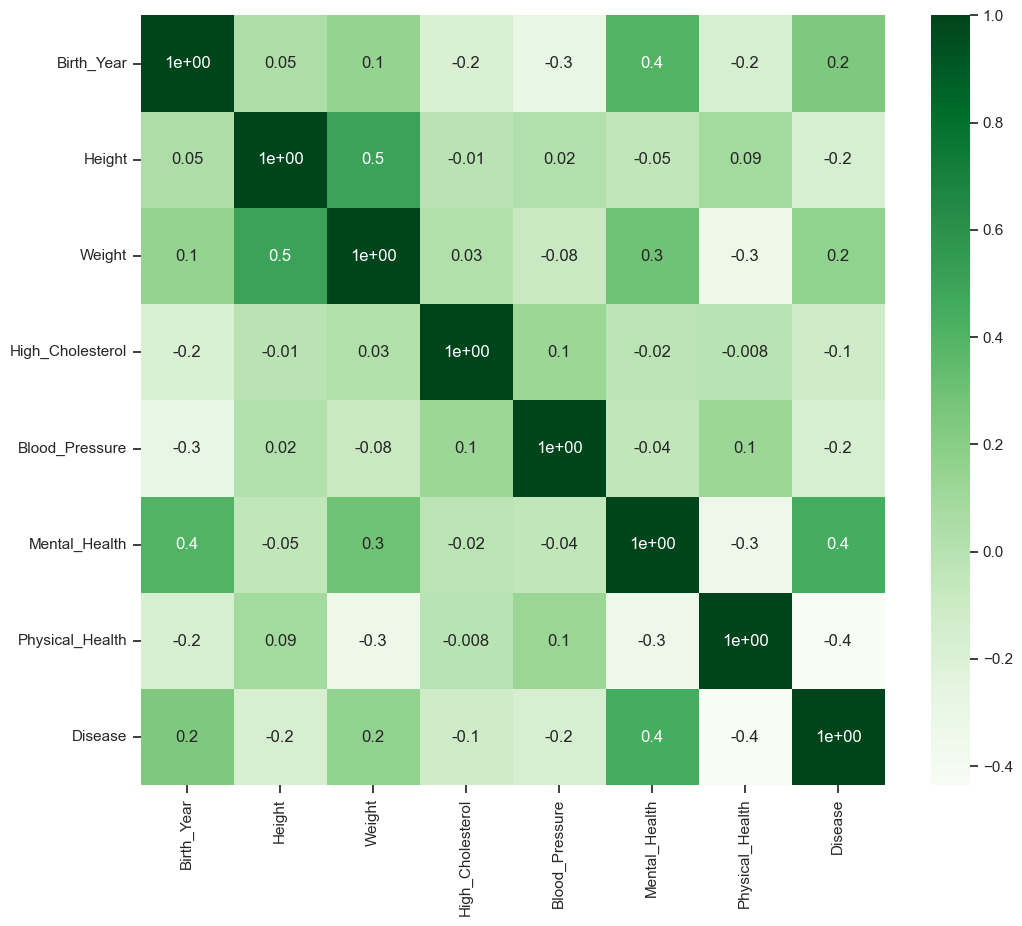

In [129]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Greens, fmt='.1')
    plt.show()
cor_pearson = train_data_corr.corr()
cor_heatmap(cor_pearson)

In [130]:
def Test_Independence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [131]:
for var in train_data_cat:
    Test_Independence(train_data_cat[var],y_train, var)

Name is NOT an important predictor. (Discard Name from model)
Region is NOT an important predictor. (Discard Region from model)
Education is NOT an important predictor. (Discard Education from model)
Smoking_Habit is IMPORTANT for Prediction
Drinking_Habit is IMPORTANT for Prediction
Exercise is IMPORTANT for Prediction
Fruit_Habit is IMPORTANT for Prediction
Water_Habit is NOT an important predictor. (Discard Water_Habit from model)
Checkup is IMPORTANT for Prediction
Diabetes is IMPORTANT for Prediction
Gender is IMPORTANT for Prediction


In [132]:
train_data_cat.drop(['Name', 'Region', 'Education', 'Smoking_Habit', 'Water_Habit'],axis=1, inplace=True)
test_data_cat.drop(['Name', 'Region', 'Education', 'Smoking_Habit', 'Water_Habit'],axis=1, inplace=True)
# train_data_cat.drop(['Name', 'Region', 'Education'],axis=1, inplace=True)

In [133]:
train_data_num

,Birth_Year,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health
PatientID,,,,,,,
1585,1982,162,71,203,140,24,6
1009,1968,174,70,290,122,10,15
1206,1963,171,60,222,126,14,10
1560,1964,157,47,201,130,13,2
1403,1976,154,61,208,105,23,0
...,...,...,...,...,...,...,...
1515,1973,180,62,192,120,15,9
1921,1964,171,71,222,146,7,9
1021,1955,155,72,227,106,16,1


<a class="anchor" id="4th-bullet">


###  Checking and changing unique values

</a>

In [134]:
#create function to generate countplot based on the feature we want to see plotted
def countplot(feature):
    #Themes
    custom_params = {"axes.spines.right": False, "axes.spines.top": False}
    sns.set_theme(style="ticks", rc=custom_params)
    #create coutplot
    ctplot=sns.countplot(data=train_data_cat, x=feature, dodge=False, hue=feature)
    ctplot.set(xticklabels=[])
    ctplot.set_title('Distribution of ' + feature)
    #legend's position
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

    plt.figure(figsize=(8,4))
    plt.show()



<a class="anchor" id="4th-bullet">


##### Drinking Habit

</a>

In [135]:
train_data_cat['Drinking_Habit'].unique()

array(['I usually consume alcohol every day',
       'I consider myself a social drinker',
       'I do not consume any type of alcohol'], dtype=object)

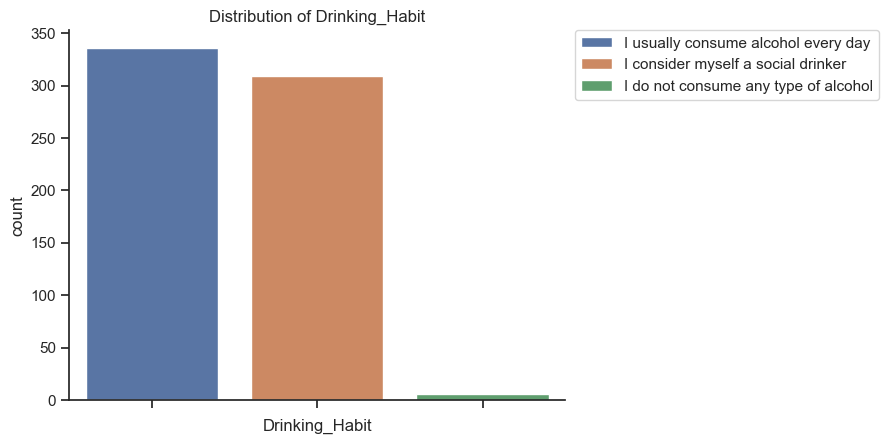

<Figure size 800x400 with 0 Axes>

In [136]:
countplot('Drinking_Habit')

In [137]:
#Rename to shorter values
dict_drinking_habit = {"I consider myself a social drinker" : 'Social drinker',  'I usually consume alcohol every day' : 'Every day', "I do not consume any type of alcohol": 'Not consume'}
train_data_cat.replace({"Drinking_Habit": dict_drinking_habit}, inplace=True)
test_data_cat.replace({"Drinking_Habit": dict_drinking_habit}, inplace=True)

<a class="anchor" id="4th-bullet">


##### Fruit Habit

</a>

In [138]:
train_data_cat['Fruit_Habit'].unique()

array(['Less than 1. I do not consume fruits every day.',
       '3 to 4 pieces of fruit in average',
       '1 to 2 pieces of fruit in average',
       '5 to 6 pieces of fruit in average',
       'More than six pieces of fruit'], dtype=object)

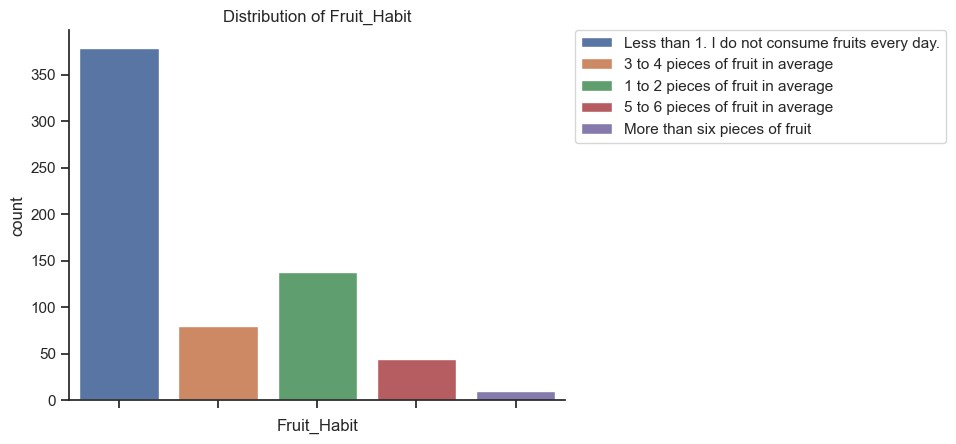

<Figure size 800x400 with 0 Axes>

In [139]:
countplot('Fruit_Habit')

#Shortening value
train_data_cat["Fruit_Habit"].replace('Less than 1. I do not consume fruits every day.', 'Not consume', inplace=True)
#Aggregate values on fruit_habit
###Aggregate 1 to 4 pieces of fruit
train_data_cat["Fruit_Habit"].replace(['1 to 2 pieces of fruit in average', '3 to 4 pieces of fruit in average'], '1-4', inplace=True)
###Aggregate 5 or more pieces of fruit
train_data_cat["Fruit_Habit"].replace(['5 to 6 pieces of fruit in average', 'More than six pieces of fruit'], 'More than 5', inplace=True)

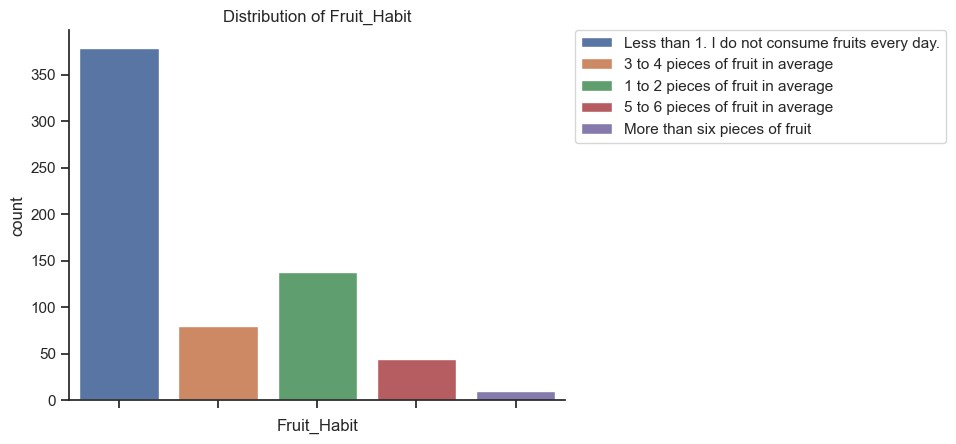

<Figure size 800x400 with 0 Axes>

In [140]:
##Checking with the aggregation done
countplot('Fruit_Habit')

<a class="anchor" id="4th-bullet">


##### Checkup

</a>

In [141]:
train_data_cat['Checkup'].unique()

array(['Not sure', 'More than 3 years',
       'Less than 3 years but more than 1 year', 'Less than three months'],
      dtype=object)

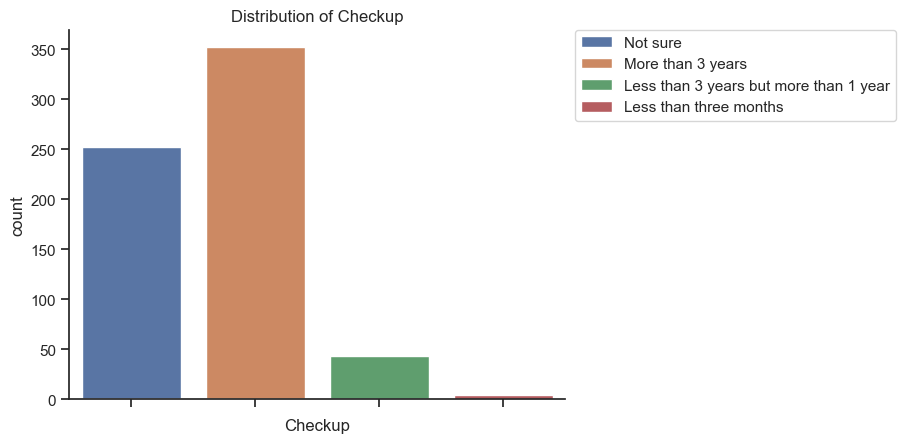

<Figure size 800x400 with 0 Axes>

In [142]:
countplot('Checkup')

In [143]:
#Shortening values
dict_checkup = {"Less than 3 years but more than 1 year" : '1-3 years',  'Less than three months' : 'Less than 3 months'}
train_data_cat.replace({"Checkup": dict_checkup}, inplace=True)
test_data_cat.replace({"Checkup": dict_checkup}, inplace=True)

<a class="anchor" id="4th-bullet">


##### Diabetes

</a>

In [144]:
train_data_cat['Diabetes'].unique()

array(["I don't have diabetes, but I have direct family members who have diabetes.",
       'Neither I nor my immediate family have diabetes.',
       'I have/had pregnancy diabetes or borderline diabetes',
       'I do have diabetes'], dtype=object)

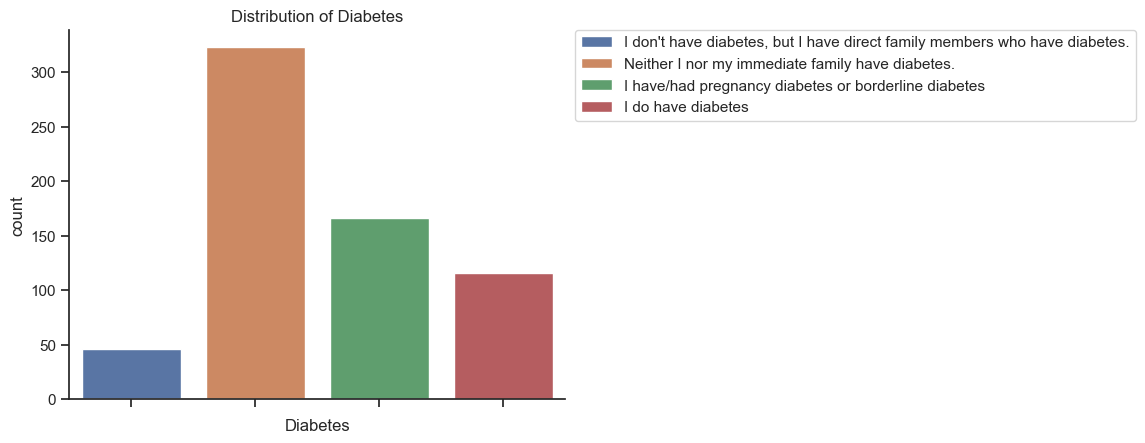

<Figure size 800x400 with 0 Axes>

In [145]:
countplot('Diabetes')

##Aggregate to create 'No' value
train_data_cat["Diabetes"].replace(['Neither I nor my immediate family have diabetes.', "I don't have diabetes, but I have direct family members who have diabetes."], 'No', inplace=True)
#Shorter values
dict_diabetes = {"I do have diabetes" : 'Yes',  'I have/had pregnancy diabetes or borderline diabetes' : 'Pregnancy or Borderline Diabetes'}
train_data_cat.replace({"Diabetes": dict_diabetes}, inplace=True)

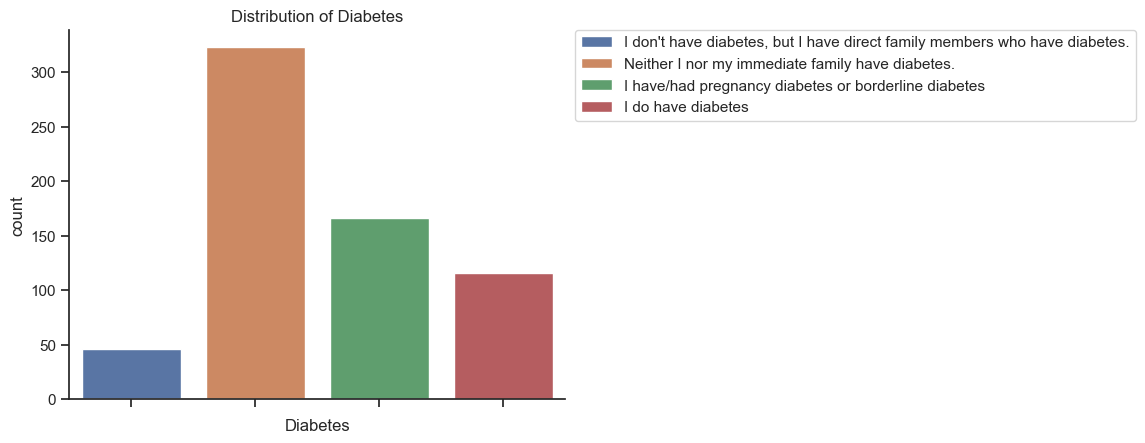

<Figure size 800x400 with 0 Axes>

In [146]:
##Check aggregated distribution
countplot('Diabetes')

<a class="anchor" id="4th-bullet">


##### Gender

</a>

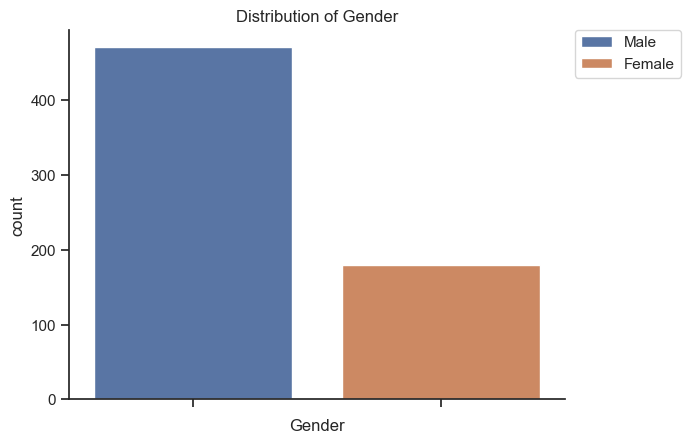

<Figure size 800x400 with 0 Axes>

In [147]:
countplot('Gender')

In [148]:
#Change gender to 'Gender Male' in order to have 0/1 values
train_data_cat['Gender'].replace(['Male'], 1, inplace=True)
train_data_cat['Gender'].replace(['Female'], 0, inplace=True)
train_data_cat.rename(columns={'Gender':'Gender Male'}, inplace=True)

test_data_cat['Gender'].replace(['Male'], 1, inplace=True)
test_data_cat['Gender'].replace(['Female'], 0, inplace=True)
test_data_cat.rename(columns={'Gender':'Gender Male'}, inplace=True)

In [149]:
train_data_cat.sample(5)

,Drinking_Habit,Exercise,Fruit_Habit,Checkup,Diabetes,Gender Male
PatientID,,,,,,
1870,Every day,0,Less than 1. I do not consume fruits every day.,More than 3 years,I have/had pregnancy diabetes or borderline di...,0
1977,Every day,0,Less than 1. I do not consume fruits every day.,More than 3 years,I do have diabetes,1
1971,Every day,0,Less than 1. I do not consume fruits every day.,Not sure,I have/had pregnancy diabetes or borderline di...,1
1582,Every day,0,Less than 1. I do not consume fruits every day.,More than 3 years,I do have diabetes,1
1406,Social drinker,0,Less than 1. I do not consume fruits every day.,More than 3 years,I have/had pregnancy diabetes or borderline di...,1


<a class="anchor" id="4th-bullet">


# TESTES

</a>

In [150]:
scaler = MinMaxScaler()
train_data_num_scaled = scaler.fit_transform(train_data_num)
train_data_num_scaled = pd.DataFrame(train_data_num_scaled, columns = train_data_num.columns).set_index(train_data_num.index)

test_data_num_scaled = scaler.transform(test_data_num)
test_data_num_scaled = pd.DataFrame(test_data_num_scaled, columns = test_data_num.columns).set_index(test_data_num.index)

train_data_num_scaled.head(3)

,Birth_Year,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health
PatientID,,,,,,,
1585,0.770833,0.379310,0.535714,0.320175,0.534884,0.827586,0.30
1009,0.479167,0.793103,0.517857,0.701754,0.325581,0.344828,0.75
1206,0.375000,0.689655,0.339286,0.403509,0.372093,0.482759,0.50


In [151]:
train_data_num_scaled.var()

Birth_Year          0.034842
Height              0.072406
Weight              0.046080
High_Cholesterol    0.038120
Blood_Pressure      0.037123
Mental_Health       0.035153
Physical_Health     0.062038
dtype: float64

In [152]:
train_data_cat

,Drinking_Habit,Exercise,Fruit_Habit,Checkup,Diabetes,Gender Male
PatientID,,,,,,
1585,Every day,1,Less than 1. I do not consume fruits every day.,Not sure,"I don't have diabetes, but I have direct famil...",1
1009,Social drinker,1,3 to 4 pieces of fruit in average,More than 3 years,Neither I nor my immediate family have diabetes.,1
1206,Every day,0,1 to 2 pieces of fruit in average,1-3 years,I have/had pregnancy diabetes or borderline di...,1
1560,Every day,0,Less than 1. I do not consume fruits every day.,More than 3 years,Neither I nor my immediate family have diabetes.,0
1403,Every day,0,Less than 1. I do not consume fruits every day.,More than 3 years,I do have diabetes,0
...,...,...,...,...,...,...
1515,Every day,0,5 to 6 pieces of fruit in average,Not sure,I have/had pregnancy diabetes or borderline di...,1
1921,Every day,0,1 to 2 pieces of fruit in average,Not sure,Neither I nor my immediate family have diabetes.,1
1021,Every day,0,3 to 4 pieces of fruit in average,More than 3 years,Neither I nor my immediate family have diabetes.,0


In [153]:
test_data_cat

,Drinking_Habit,Exercise,Fruit_Habit,Checkup,Diabetes,Gender Male
PatientID,,,,,,
1121,Every day,1,Less than 1. I do not consume fruits every day.,1-3 years,Neither I nor my immediate family have diabetes.,1
1034,Every day,0,Less than 1. I do not consume fruits every day.,More than 3 years,I have/had pregnancy diabetes or borderline di...,1
1201,Social drinker,0,Less than 1. I do not consume fruits every day.,More than 3 years,"I don't have diabetes, but I have direct famil...",1
1073,Every day,1,1 to 2 pieces of fruit in average,Not sure,Neither I nor my immediate family have diabetes.,1
1285,Social drinker,0,1 to 2 pieces of fruit in average,More than 3 years,I have/had pregnancy diabetes or borderline di...,0
...,...,...,...,...,...,...
1992,Social drinker,0,Less than 1. I do not consume fruits every day.,More than 3 years,Neither I nor my immediate family have diabetes.,0
1906,Every day,0,Less than 1. I do not consume fruits every day.,More than 3 years,Neither I nor my immediate family have diabetes.,1
1592,Every day,1,1 to 2 pieces of fruit in average,Not sure,I have/had pregnancy diabetes or borderline di...,1


In [154]:
df_ohc = train_data_cat.copy()

In [155]:
ohc = OneHotEncoder(sparse=False)
ohc_feat = ohc.fit_transform(df_ohc.drop(['Exercise', 'Gender Male'], axis=1))
ohc_feat_names = ohc.get_feature_names_out()
ohc_df = pd.DataFrame(ohc_feat, index=df_ohc.index, columns=ohc_feat_names)
ohc_df

,Drinking_Habit_Every day,Drinking_Habit_Not consume,Drinking_Habit_Social drinker,Fruit_Habit_1 to 2 pieces of fruit in average,Fruit_Habit_3 to 4 pieces of fruit in average,Fruit_Habit_5 to 6 pieces of fruit in average,Fruit_Habit_Less than 1. I do not consume fruits every day.,Fruit_Habit_More than six pieces of fruit,Checkup_1-3 years,Checkup_Less than 3 months,Checkup_More than 3 years,Checkup_Not sure,Diabetes_I do have diabetes,"Diabetes_I don't have diabetes, but I have direct family members who have diabetes.",Diabetes_I have/had pregnancy diabetes or borderline diabetes,Diabetes_Neither I nor my immediate family have diabetes.
PatientID,,,,,,,,,,,,,,,,
1585,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1009,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1206,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1560,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1403,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1921,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1021,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [156]:
df_ohc_test = test_data_cat.copy()
ohc_feat_test = ohc.fit_transform(df_ohc_test.drop(['Exercise', 'Gender Male'], axis=1))
ohc_feat_names_test = ohc.get_feature_names_out()
ohc_df_test = pd.DataFrame(ohc_feat_test, index=df_ohc_test.index, columns=ohc_feat_names_test)
ohc_df_test


,Drinking_Habit_Every day,Drinking_Habit_Not consume,Drinking_Habit_Social drinker,Fruit_Habit_1 to 2 pieces of fruit in average,Fruit_Habit_3 to 4 pieces of fruit in average,Fruit_Habit_5 to 6 pieces of fruit in average,Fruit_Habit_Less than 1. I do not consume fruits every day.,Fruit_Habit_More than six pieces of fruit,Checkup_1-3 years,Checkup_Less than 3 months,Checkup_More than 3 years,Checkup_Not sure,Diabetes_I do have diabetes,"Diabetes_I don't have diabetes, but I have direct family members who have diabetes.",Diabetes_I have/had pregnancy diabetes or borderline diabetes,Diabetes_Neither I nor my immediate family have diabetes.
PatientID,,,,,,,,,,,,,,,,
1121,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1034,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1201,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1073,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1285,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1906,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1592,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [157]:
train_data_cat  = pd.concat([train_data_cat,ohc_df],axis = 1)
train_data_cat.drop(['Drinking_Habit', 'Fruit_Habit', 'Checkup', 'Diabetes'], inplace=True, axis=1)
# train_data_cat.drop(['Drinking_Habit', 'Fruit_Habit', 'Checkup', 'Diabetes', 'Smoking_Habit_0', 'Water_Habit'], inplace=True, axis=1)
train_data_cat

,Exercise,Gender Male,Drinking_Habit_Every day,Drinking_Habit_Not consume,Drinking_Habit_Social drinker,Fruit_Habit_1 to 2 pieces of fruit in average,Fruit_Habit_3 to 4 pieces of fruit in average,Fruit_Habit_5 to 6 pieces of fruit in average,Fruit_Habit_Less than 1. I do not consume fruits every day.,Fruit_Habit_More than six pieces of fruit,Checkup_1-3 years,Checkup_Less than 3 months,Checkup_More than 3 years,Checkup_Not sure,Diabetes_I do have diabetes,"Diabetes_I don't have diabetes, but I have direct family members who have diabetes.",Diabetes_I have/had pregnancy diabetes or borderline diabetes,Diabetes_Neither I nor my immediate family have diabetes.
PatientID,,,,,,,,,,,,,,,,,,
1585,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1009,1,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1206,0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1560,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1403,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1921,0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1021,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [158]:
test_data_cat  = pd.concat([test_data_cat,ohc_df_test],axis = 1)
test_data_cat.drop(['Drinking_Habit', 'Fruit_Habit', 'Checkup', 'Diabetes'], inplace=True, axis=1)
# train_data_cat.drop(['Drinking_Habit', 'Fruit_Habit', 'Checkup', 'Diabetes', 'Smoking_Habit_0', 'Water_Habit'], inplace=True, axis=1)
test_data_cat

,Exercise,Gender Male,Drinking_Habit_Every day,Drinking_Habit_Not consume,Drinking_Habit_Social drinker,Fruit_Habit_1 to 2 pieces of fruit in average,Fruit_Habit_3 to 4 pieces of fruit in average,Fruit_Habit_5 to 6 pieces of fruit in average,Fruit_Habit_Less than 1. I do not consume fruits every day.,Fruit_Habit_More than six pieces of fruit,Checkup_1-3 years,Checkup_Less than 3 months,Checkup_More than 3 years,Checkup_Not sure,Diabetes_I do have diabetes,"Diabetes_I don't have diabetes, but I have direct family members who have diabetes.",Diabetes_I have/had pregnancy diabetes or borderline diabetes,Diabetes_Neither I nor my immediate family have diabetes.
PatientID,,,,,,,,,,,,,,,,,,
1121,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1034,0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1201,0,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1073,1,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1285,0,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1906,0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1592,1,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [159]:
X_train=train_data_num_scaled.merge(train_data_cat, on = 'PatientID')

X_train

,Birth_Year,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Exercise,Gender Male,Drinking_Habit_Every day,...,Fruit_Habit_Less than 1. I do not consume fruits every day.,Fruit_Habit_More than six pieces of fruit,Checkup_1-3 years,Checkup_Less than 3 months,Checkup_More than 3 years,Checkup_Not sure,Diabetes_I do have diabetes,"Diabetes_I don't have diabetes, but I have direct family members who have diabetes.",Diabetes_I have/had pregnancy diabetes or borderline diabetes,Diabetes_Neither I nor my immediate family have diabetes.
PatientID,,,,,,,,,,,,,,,,,,,,,
1585,0.770833,0.379310,0.535714,0.320175,0.534884,0.827586,0.30,1,1,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1009,0.479167,0.793103,0.517857,0.701754,0.325581,0.344828,0.75,1,1,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1206,0.375000,0.689655,0.339286,0.403509,0.372093,0.482759,0.50,0,1,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1560,0.395833,0.206897,0.107143,0.311404,0.418605,0.448276,0.10,0,0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1403,0.645833,0.103448,0.357143,0.342105,0.127907,0.793103,0.00,0,0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,0.583333,1.000000,0.375000,0.271930,0.302326,0.517241,0.45,0,1,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1921,0.395833,0.689655,0.535714,0.403509,0.604651,0.241379,0.45,0,1,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1021,0.208333,0.137931,0.553571,0.425439,0.139535,0.551724,0.05,0,0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [160]:
X_test=test_data_num_scaled.merge(test_data_cat, on = 'PatientID')

X_test

,Birth_Year,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Exercise,Gender Male,Drinking_Habit_Every day,...,Fruit_Habit_Less than 1. I do not consume fruits every day.,Fruit_Habit_More than six pieces of fruit,Checkup_1-3 years,Checkup_Less than 3 months,Checkup_More than 3 years,Checkup_Not sure,Diabetes_I do have diabetes,"Diabetes_I don't have diabetes, but I have direct family members who have diabetes.",Diabetes_I have/had pregnancy diabetes or borderline diabetes,Diabetes_Neither I nor my immediate family have diabetes.
PatientID,,,,,,,,,,,,,,,,,,,,,
1121,0.687500,0.793103,0.232143,0.188596,0.302326,0.551724,0.65,1,1,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1034,0.562500,0.931034,0.714286,0.307018,0.406977,0.724138,0.00,0,1,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1201,0.895833,0.931034,0.910714,0.245614,0.279070,0.793103,0.00,0,1,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1073,0.375000,0.931034,0.750000,0.223684,0.534884,0.689655,0.00,1,1,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1285,0.125000,0.551724,0.607143,0.609649,0.186047,0.448276,0.00,0,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,0.562500,0.551724,0.714286,0.561404,0.186047,0.689655,0.00,0,0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1906,0.729167,0.551724,0.732143,0.438596,0.534884,0.827586,0.00,0,1,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1592,0.145833,0.551724,0.482143,0.627193,0.767442,0.310345,0.70,1,1,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [161]:
def avg_score_KF(split_method,X,y,model):
    score_train = []
    score_test = []
    for train_index, test_index in split_method.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        value_train = model.score(X_train, y_train)
        value_test = model.score(X_test,y_test)
        score_train.append(value_train)
        score_test.append(value_test)

    
    # print('Training mean accuracy for each model:', score_train)
    # print('\nTest mean accuracy for each model:', score_test)
    print('\nTrain average value:' +  str(round(np.mean(score_train),2)) + '+/-' + str(round(np.std(score_train),2)))
    print('\nTest average value:' +  str(round(np.mean(score_test),2)) + '+/-' + str(round(np.std(score_test),2)))

In [162]:
# DO IT
kf = KFold(n_splits=10)
print('\n Gradient Boosting')
avg_score_KF(kf, X_train, y_train, GradientBoostingClassifier())

print('\n Random Forest')
avg_score_KF(kf, X_train, y_train, RandomForestClassifier())

print('\n Neural Network')
avg_score_KF(kf, X_train, y_train, MLPClassifier())

print('\n Naive Bayes')
avg_score_KF(kf, X_train, y_train, GaussianNB())

print('\n Logistic Regression')
avg_score_KF(kf, X_train, y_train, LogisticRegression())

print('\n ADA Boosting')
avg_score_KF(kf, X_train, y_train, AdaBoostClassifier())

print('\n Extra Tree Classifier')
avg_score_KF(kf, X_train, y_train, ExtraTreesClassifier())

print('\n Support Vector Classifier')
avg_score_KF(kf, X_train, y_train, SVC())

print('\n Bagging Classifier')
avg_score_KF(kf, X_train, y_train, BaggingClassifier())


 Gradient Boosting

Train average value:0.99+/-0.0

Test average value:0.94+/-0.03

 Random Forest

Train average value:1.0+/-0.0

Test average value:0.96+/-0.03

 Neural Network

Train average value:0.94+/-0.01

Test average value:0.89+/-0.04

 Naive Bayes

Train average value:0.82+/-0.04

Test average value:0.81+/-0.08

 Logistic Regression

Train average value:0.88+/-0.01

Test average value:0.86+/-0.05

 ADA Boosting

Train average value:0.93+/-0.01

Test average value:0.88+/-0.04

 Extra Tree Classifier

Train average value:1.0+/-0.0

Test average value:0.97+/-0.03

 Support Vector Classifier

Train average value:0.92+/-0.01

Test average value:0.87+/-0.05

 Bagging Classifier

Train average value:1.0+/-0.0

Test average value:0.95+/-0.03


In [163]:
def train_test_accuracy(model):
      train_accuracy=metrics.accuracy_score(y_train, model.predict(X_train))*100
      test_accuracy=metrics.accuracy_score(y_test, model.predict(X_test))*100
      return train_accuracy, test_accuracy

def f1_score(model):
      return metrics.f1_score(y_test,model.predict(X_test)) 

In [164]:


#NN = MLPClassifier(solver = 'sgd', learning_rate='adaptive', learning_rate_init = 0.7, hidden_layer_sizes=110,
#                    activation='tanh', max_iter=200, random_state=48)
NN = MLPClassifier(solver = 'sgd', learning_rate='adaptive', learning_rate_init = 0.7, hidden_layer_sizes=110,
                     activation='tanh', max_iter=200, random_state=48)
NN.fit(X_train, y_train)
# NN_score = NN.score(X_test,y_test)
NN_score= metrics.f1_score(y_test,NN.predict(X_test))

# KNN = KNeighborsClassifier()
# KNN.fit(X_train, y_train)
# KNN_score = metrics.f1_score(y_test,KNN.predict(X_test))

RF1 = RandomForestClassifier(class_weight='balanced', n_estimators=110,
                            criterion='gini', max_features=None)
RF1.fit(X_train, y_train)
RF1_score = metrics.f1_score(y_test,RF1.predict(X_test))

RF2 = RandomForestClassifier(class_weight='balanced_subsample', n_estimators=90,
                            criterion='log_loss', max_features=None)
RF2.fit(X_train, y_train)
RF2_score = metrics.f1_score(y_test,RF2.predict(X_test))

GB1= GradientBoostingClassifier(learning_rate=0.6,n_estimators=120,criterion='squared_error', loss='exponential',
                                max_features='sqrt' )
GB1.fit(X_train, y_train)
GB1_score = metrics.f1_score(y_test,GB1.predict(X_test))

GB2= GradientBoostingClassifier(learning_rate=0.3,n_estimators=140,criterion='squared_error', loss='log_loss',
                                max_features='log2' )
GB2.fit(X_train, y_train)
GB2_score = metrics.f1_score(y_test,GB2.predict(X_test))

GB3= GradientBoostingClassifier(learning_rate=0.5,n_estimators=140,criterion='friedman_mse', loss='exponential',
                                max_features='sqrt' )
GB3.fit(X_train, y_train)
GB3_score = metrics.f1_score(y_test,GB3.predict(X_test))

GB4= GradientBoostingClassifier(learning_rate=0.7,n_estimators=130,criterion='squared_error', loss='log_loss',
                                max_features='log2' )
GB4.fit(X_train, y_train)
GB4_score = metrics.f1_score(y_test,GB4.predict(X_test))





logistic = LogisticRegression().fit(X_train, y_train)
logistic_score=metrics.f1_score(y_test,logistic.predict(X_test))

# adaboost = AdaBoostClassifier(n_estimators=100, random_state=0).fit(X_train,y_train)
# ada_score = metrics.f1_score(y_test,adaboost.predict(X_test))

# dtree = DecisionTreeClassifier(random_state = 42)
# # dtree.fit(X_train, y_train)
# param_grid = {
#     "max_depth": [3,5,10,15,20,25,None],
#     "min_samples_split": [2,5,7,10,13],
#     "min_samples_leaf": [1,2,5,7]
# }
# grid_cv = GridSearchCV(dtree, param_grid, scoring="accuracy", n_jobs=-2, cv=3).fit(X_train, y_train)



In [165]:
models=[NN, RF1, RF2, GB1, GB2, GB3, GB4, logistic]
models_names=['NN', 'RF1','RF2', 'GB1', 'GB2', 'GB3', 'GB4', 'logistic']
models_acc=list(map(train_test_accuracy, models))
result_tuple = list(map(list, zip(*models_acc)))
train_acc, test_acc = result_tuple

results = pd.DataFrame({
    'Model': models_names,
    'Score': list(map(f1_score, models)),
    'Train Acc': train_acc,
    'Test Acc': test_acc
    })
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')
result_df


,Score,Train Acc,Test Acc
Model,,,
NN,1.000000,100.000000,100.000000
GB2,0.991870,100.000000,99.166667
RF2,0.983871,100.000000,98.333333
RF1,0.983607,100.000000,98.333333
GB3,0.983607,100.000000,98.333333
GB1,0.975610,100.000000,97.500000
GB4,0.975610,100.000000,97.500000
logistic,0.846154,87.403994,83.333333


In [166]:
train_data

,Name,Birth_Year,Region,Education,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes,Gender
PatientID,,,,,,,,,,,,,,,,,,
1001,Mr. Charles Bolek,1969,East of England,High School Graduate,Yes,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,174,54,207,140,19,15,Not sure,Neither I nor my immediate family have diabetes.,Male
1003,Mr. Boyd Cook,1961,Yorkshire and the Humber,High School Graduate,No,I usually consume alcohol every day,No,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,173,76,207,148,20,0,Not sure,Neither I nor my immediate family have diabetes.,Male
1004,Mrs. Maggie Jones,1960,London,University Complete (3 or more years),Yes,I usually consume alcohol every day,No,5 to 6 pieces of fruit in average,Between one liter and two liters,155,59,298,138,8,9,More than 3 years,Neither I nor my immediate family have diabetes.,Female
1005,Mrs. Hazel Eison,1964,South West,University Complete (3 or more years),No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,158,56,252,100,11,4,More than 3 years,Neither I nor my immediate family have diabetes.,Female
1006,Mr. Luis Pham,1964,Yorkshire and the Humber,High School Graduate,No,I do not consume any type of alcohol,No,5 to 6 pieces of fruit in average,Between one liter and two liters,174,55,322,114,15,21,Less than 3 years but more than 1 year,Neither I nor my immediate family have diabetes.,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,Mr. William Hurd,1975,South West,University Complete (3 or more years),No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters,167,76,208,112,16,0,More than 3 years,Neither I nor my immediate family have diabetes.,Male
2020,Mr. Jim Garrett,1963,North East,High School Graduate,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,167,71,225,140,21,0,More than 3 years,I do have diabetes,Male
2022,Mr. Barry Holman,1975,South East,University Complete (3 or more years),No,I consider myself a social drinker,Yes,1 to 2 pieces of fruit in average,Between one liter and two liters,167,53,279,110,10,4,More than 3 years,Neither I nor my immediate family have diabetes.,Male


In [167]:
# import joblib
# joblib.dump(GB, 'my_model.pkl', compress=9)

In [168]:
# from lazypredict.Supervised import LazyClassifier
# testtt = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
# models,predictions = testtt.fit(X_train, X_test, y_train, y_test)
# print(models)

In [186]:

etc = ExtraTreesClassifier(class_weight='balanced_subsample', random_state=6, n_estimators=140, criterion='log_loss', max_features='log2')
etc.fit(X_train, y_train)
etc_score = metrics.f1_score(y_test,etc.predict(X_test))
print(etc_score)


1.0


In [170]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline
# from sklearn.decomposition import TruncatedSVD


# # parameters = [                           
# #               {
# #                 'hidden_layer_sizes': range(90, 150, 10),
# #                 'activation': ['identity', 'logistic', 'tanh', 'relu'],
# #                 'solver' : ['lbfgs', 'sgd', 'adam'],
# #                 'learning_rate' : ["constant", "invscaling", 'adaptive'],
# #                 'learning_rate_init' : [0.3,0.5,0.7],
# #                 'max_iter': range(200,300,50)
# #                 }
# #               ]

# parameter = [                           
#               {
#                 'hidden_layer_sizes': range(90, 130, 10),
#                 'activation': ['tanh', 'relu'],
#                 'learning_rate_init' : [0.3,0.4,0.7,0.8],
#                 'max_iter': range(160,240,10)
#                 }
#               ]
# grid_search = GridSearchCV(MLPClassifier(learning_rate='adaptive', solver='sgd'), param_grid=parameter, scoring="accuracy")

# grid_search.fit(X_train, y_train)
# print(f"Best parameters : \n\n{grid_search.best_params_}")
# df = pd.DataFrame(grid_search.cv_results_)
# # df = df[['param_hidden_layer_sizes','param_activation','param_solver','param_learning_rate','param_learning_rate_init',
# #          'param_max_iter','mean_test_score','rank_test_score']]
# #print(df.sort_values('rank_test_score'))
# df=df[['param_hidden_layer_sizes','param_activation','param_learning_rate_init','param_max_iter','mean_test_score','rank_test_score']]

# df.sort_values('rank_test_score', inplace=True)
# df

In [171]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline
# from sklearn.decomposition import TruncatedSVD


# parameters2 = [                           
#               {
#                 'algorithm': ['SAMME', 'SAMME.R'],
#                 'learning_rate':  [0.5, 0.7, 1, 1.2,1.5],
#                 'n_estimators' : range(50,100,10),
#                 }
#               ]


# grid_search = GridSearchCV(AdaBoostClassifier(), param_grid=parameters2, scoring="accuracy")

# grid_search.fit(X_train, y_train)
# #df = pd.DataFrame(grid_search.cv_results_['param_loss','param_criterion','param_max_features','rank_test_score'])
# df = pd.DataFrame(grid_search.cv_results_)
# df = df[['param_algorithm','param_n_estimators','param_learning_rate',
#         'mean_test_score','rank_test_score']]
# #print(df.sort_values('rank_test_score'))
# #print(f"Best parameters : \n\n{grid_search.best_params_}")
# df.sort_values('rank_test_score', inplace=True)
# df

In [172]:
# parameters3 = [                           
#               {
#                 'class_weight':['balanced', 'balanced_subsample'],
#                 'n_estimators' : range(90,150,10),
#                 'criterion' : ["entropy", 'log_loss'],
#                 'max_features': ['sqrt', 'log2'],
#                 'max_depth':[19,20,21]
#                 }
#               ]


# grid_search = GridSearchCV(ExtraTreesClassifier(), param_grid=parameters3, scoring="accuracy")

# grid_search.fit(X_train, y_train)
# #df = pd.DataFrame(grid_search.cv_results_['param_loss','param_criterion','param_max_features','rank_test_score'])
# df = pd.DataFrame(grid_search.cv_results_)
# df = df[['param_class_weight','param_n_estimators','param_criterion','param_max_features','param_max_depth',
#         'mean_test_score','rank_test_score']]
# #print(df.sort_values('rank_test_score'))
# #print(f"Best parameters : \n\n{grid_search.best_params_}")
# df.sort_values('rank_test_score', inplace=True)
# df

In [184]:
test_demo=pd.read_excel('test_demo.xlsx')
test_habits=pd.read_excel('test_habits.xlsx')
test_health=pd.read_excel('test_health.xlsx')
print(test_demo.shape)
print(test_habits.shape)
print(test_health.shape)
test_df = test_demo.merge(test_habits, on = 'PatientID').merge(test_health, on = 'PatientID')
test_df.sample(3)
test_df.set_index('PatientID', inplace=True)
#test_df.sort_index(axis=0, inplace=True)
test_df['Gender'] = test_df.apply(lambda row: 'Male' if row['Name'].startswith('Mr.') else 'Female', axis=1)
test_df.info()
test_data_num = test_df.select_dtypes(include=np.number).set_index(test_df.index).copy()
test_data_cat = test_df.select_dtypes(exclude=np.number).set_index(test_df.index).copy()
test_data_cat['Smoking_Habit']=pd.Series(np.where(test_data_cat.Smoking_Habit.values == 'Yes', 1, 0),test_data_cat.index)
test_data_cat['Exercise']=pd.Series(np.where(test_data_cat.Exercise.values == 'Yes', 1, 0),test_data_cat.index)
def age(birthdate):
    year = date.today().year
    age = year - birthdate 
    return age

# test_data_num['Birth_Year'] = test_data_num['Birth_Year'].apply(lambda x: age(x))
# test_data_num.rename(columns = {'Birth_Year':'Age'}, inplace=True)
#from Group03 import scaler


test_data_scaled = scaler.transform(test_data_num)
test_data_scaled = pd.DataFrame(test_data_scaled, columns = test_data_num.columns).set_index(test_data_num.index)
test_data_scaled.head(3)
test_data_cat.drop(['Name', 'Region', 'Education', 'Smoking_Habit', 'Water_Habit'],axis=1, inplace=True)
# Difine Dict with the key-value pair to remap.
dict_drinking_habit = {"I consider myself a social drinker" : 'Social drinker',  'I usually consume alcohol every day' : 'Every day', "I do not consume any type of alcohol": 'Not consume'}
test_data_cat.replace({"Drinking_Habit": dict_drinking_habit}, inplace=True)

#Aggregate values on fruit_habit
#####test_data_cat["Fruit_Habit"].replace('Less than 1. I do not consume fruits every day.', 'Not consume', inplace=True)
#####test_data_cat["Fruit_Habit"].replace(['1 to 2 pieces of fruit in average', '3 to 4 pieces of fruit in average'], '1-4', inplace=True)
#####test_data_cat["Fruit_Habit"].replace(['5 to 6 pieces of fruit in average', 'More than six pieces of fruit'], 'More than 5', inplace=True)

dict_checkup = {"Less than 3 years but more than 1 year" : '1-3 years',  'Less than three months' : 'Less than 3 months'}
test_data_cat.replace({"Checkup": dict_checkup}, inplace=True)

#####test_data_cat["Diabetes"].replace(['Neither I nor my immediate family have diabetes.', "I don't have diabetes, but I have direct family members who have diabetes."], 'No', inplace=True)
#####dict_diabetes = {"I do have diabetes" : 'Yes',  'I have/had pregnancy diabetes or borderline diabetes' : 'Pregnancy or Borderline Diabetes'}
#####test_data_cat.replace({"Diabetes": dict_diabetes}, inplace=True)

test_data_cat['Gender'].replace(['Male'], 1, inplace=True)
test_data_cat['Gender'].replace(['Female'], 0, inplace=True)
test_data_cat.rename(columns={'Gender':'Gender Male'}, inplace=True)
df_ohc = test_data_cat.copy()
# Use OneHotEncoder to encode the categorical features. Get feature names and create a DataFrame 
# with the one-hot encoded categorical features (pass feature names)
ohc = OneHotEncoder(sparse=False)
ohc_feat = ohc.fit_transform(df_ohc.drop(['Exercise', 'Gender Male'], axis=1))
ohc_feat_names = ohc.get_feature_names_out()
ohc_df = pd.DataFrame(ohc_feat, index=df_ohc.index, columns=ohc_feat_names)
ohc_df
test_data_cat  = pd.concat([test_data_cat,ohc_df],axis = 1)
test_data_cat.drop(['Drinking_Habit', 'Fruit_Habit', 'Checkup', 'Diabetes'], inplace=True, axis=1)
test_data_cat
test_data=test_data_scaled.merge(test_data_cat, on = 'PatientID')



(225, 5)
(225, 6)
(225, 9)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 1343 to 1757
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              225 non-null    object
 1   Birth_Year        225 non-null    int64 
 2   Region            225 non-null    object
 3   Education         225 non-null    object
 4   Smoking_Habit     225 non-null    object
 5   Drinking_Habit    225 non-null    object
 6   Exercise          225 non-null    object
 7   Fruit_Habit       225 non-null    object
 8   Water_Habit       225 non-null    object
 9   Height            225 non-null    int64 
 10  Weight            225 non-null    int64 
 11  High_Cholesterol  225 non-null    int64 
 12  Blood_Pressure    225 non-null    int64 
 13  Mental_Health     225 non-null    int64 
 14  Physical_Health   225 non-null    int64 
 15  Checkup           225 non-null    object
 16  Diabetes          225 non-null 

In [174]:
test_data

,Birth_Year,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Exercise,Gender Male,Drinking_Habit_Every day,...,Fruit_Habit_Less than 1. I do not consume fruits every day.,Fruit_Habit_More than six pieces of fruit,Checkup_1-3 years,Checkup_Less than 3 months,Checkup_More than 3 years,Checkup_Not sure,Diabetes_I do have diabetes,"Diabetes_I don't have diabetes, but I have direct family members who have diabetes.",Diabetes_I have/had pregnancy diabetes or borderline diabetes,Diabetes_Neither I nor my immediate family have diabetes.
PatientID,,,,,,,,,,,,,,,,,,,,,
1343,0.520833,0.724138,0.696429,0.320175,0.906977,0.689655,0.10,0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1727,0.437500,0.689655,0.696429,0.416667,0.418605,0.724138,0.00,0,1,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1828,0.687500,0.689655,0.660714,0.469298,0.418605,0.827586,0.05,1,1,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1155,0.479167,0.793103,0.821429,0.802632,0.162791,0.655172,0.00,0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1020,0.354167,0.724138,0.267857,0.258772,0.534884,0.655172,0.70,0,1,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,0.520833,0.931034,0.857143,0.377193,0.360465,0.758621,0.20,0,1,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1256,0.875000,0.103448,0.392857,0.250000,0.511628,0.862069,0.30,0,0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1318,0.375000,0.758621,0.875000,0.223684,0.534884,0.689655,0.00,1,1,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [187]:
res=etc.predict(test_data)
list_tuples = list(zip(test_data.index, res))
predictions = pd.DataFrame(list_tuples, columns=['PatientID', 'Disease'] )

predictions.set_index('PatientID', inplace=True)
predictions.to_csv("predictions_v34.csv")
